As we can see from the graph, Hill couldn't catch the ball, as it's already touched the ground before he could reach 1.0 distance from the landing point. The ball is also too far from him.
We acquired that Mahomes should throw the ball with initial velocity 20.2 m/s and initial angle 57.8 degrees.


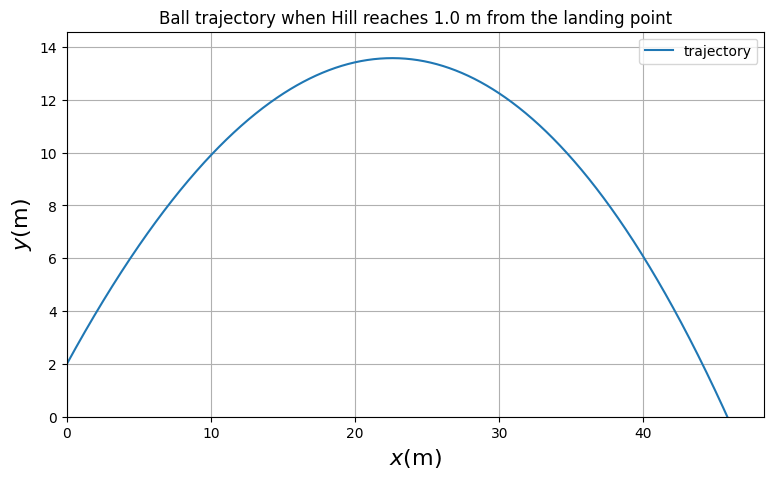

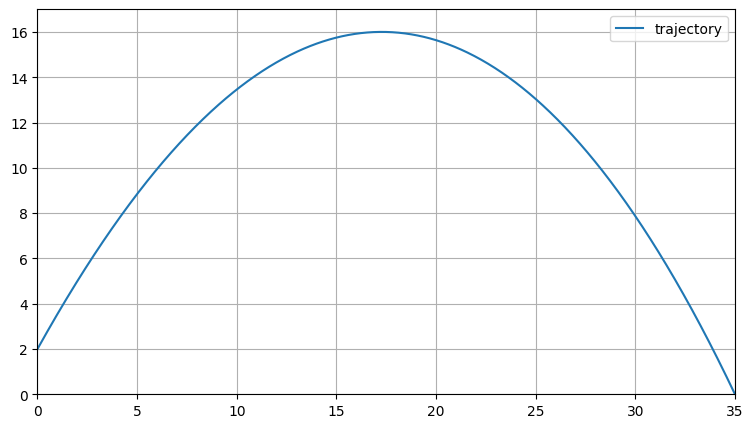

In [24]:
# Final exam problem 5
# Author: Felix Cahyadi
# Date: 03.11.2023

# Import libraries
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import fsolve, newton
from scipy.integrate import solve_ivp, solve_bvp, simpson
from scipy.fft import fft
from numpy.linalg import norm
import fysa1130

# Define a function to calculate acceleration
def acceleration(v_arr, g = 9.81,C = 1.4e-3, m = 0.45):
    vx = v_arr[0]
    vy = v_arr[1]
    abs_v = norm(v_arr,2)
    a_x = -(C/m)*abs_v*vx
    a_y = -(C/m)*abs_v*vy - g
    
    return np.array([a_x, a_y])

# Define a function to calculate the trajectory of the ball
def ball_traj(accel, y0, v0, theta, t_array):

    dt = t_array[1] - t_array[0]
    x = np.zeros_like(t_array)
    y = np.zeros_like(t_array)
    y[0] = y0
    vx = np.zeros_like(t_array)
    vx[0] = v0*np.cos(np.deg2rad(theta))
    vy = np.zeros_like(t_array)
    vy[0] = v0*np.sin(np.deg2rad(theta))

    for i in range(1,len(t_array)):
        a = accel([vx[i-1],vy[i-1]])
        vx[i] = vx[i-1] + a[0]*dt
        vy[i] = vy[i-1] + a[1]*dt
        x[i] = x[i-1] + vx[i]*dt
        y[i] = y[i-1] + vy[i]*dt

    pos = np.array([x,y])
    vel = np.array([vx,vy])

    return pos, vel


# Initial condition of the ball
y0 = 2.0
v0 = 22.0
angle = 45.0

# initial condition of the player
Hill_v = 10

# Time needed for Hill to reach 1.0 m distance from the landing point
t_1m = 34/Hill_v

t_1m_arr = np.linspace(0,t_1m, 1000)

# Positions and velocity of the ball when hill is 1m from the landing point
pos_1m, vel_1m = ball_traj(acceleration, y0, v0, angle, t_1m_arr)

# Now we plot the trajectory of the ball when Hill reach 1.0 m distance from the landing point

fig, ax = plt.subplots(figsize = (9,5))
ax.plot(pos_1m[0], pos_1m[1], label = 'trajectory')
ax.grid(True)
ax.set_xlabel("$x$(m)", fontsize = 16)
ax.set_ylabel("$y$(m)", fontsize = 16)
ax.set_xlim([pos_1m[0,0], pos_1m[0,-1]])
ax.set_ylim([0, np.max(pos_1m[1]) + 1])
ax.legend()
ax.set_title("Ball trajectory when Hill reaches 1.0 m from the landing point")
print("As we can see from the graph, Hill couldn't catch the ball, as it's already touched the ground before he could reach 1.0 distance from the landing point. The ball is also too far from him.")



# Now we are going to solve the second part of the problem, we will solve this problem using fsolve

# Create a function that is going to receive initial velocity and angle, and returns the relative position between Hill and the ball
def rel_position(init_cond):
    y0 = 2
    v0 = init_cond[0]
    angle = init_cond[1]

    # Time needed for Hill to reach 35 meters
    t_reach = 35/10
    t_reach_array = np.linspace(0,t_reach, 1000)

    pos, vel = ball_traj(acceleration, y0, v0, angle, t_reach_array)

    final_x = pos[0,-1]
    final_y = pos[1,-1]

    return np.array([final_x - 35, final_y])

sol = fsolve(rel_position, np.array([v0, angle]))

print(f"We acquired that Mahomes should throw the ball with initial velocity {sol[0]:.1f} m/s and initial angle {sol[1]:.1f} degrees.")

# Plot the new ball trajectory
pos_new, _ = ball_traj(acceleration, y0=2, v0=sol[0], theta=sol[1], t_array=np.linspace(0,35/10, 1000))

fig2, ax2 = plt.subplots(figsize = (9,5))
ax2.plot(pos_new[0], pos_new[1], label = "trajectory")
ax2.grid(True)
ax.set_xlabel("$x$(m)", fontsize = 16)
ax.set_ylabel("$y$(m)", fontsize = 16)
ax2.set_xlim([pos_new[0,0], pos_new[0,-1]])
ax2.set_ylim([0, np.max(pos_new[1])+1])
ax2.legend()


plt.show()


In [ ]:
# Plotting stuff

#fig, ax = plt.subplots(figsize = (9,5))
#ax.plot()
#ax.grid(True)
#ax.set_xlabel("")
#ax.set_ylabel("")
#ax.set_xlim([])
#ax.set_ylim([])
#ax.legend()

#plt.show()

In [ ]:
# 2D plotting

#X,Y = np.meshgrid()
#Z = 

#fig, ax = plt.subplots(figsize = (8,8))
#ax.contour(X,Y, Z, levels = [], colors = [''])
#ax.grid(True)
#ax.set_xlabel("")
#ax.set_ylabel("")
#ax.set_xlim([])
#ax.set_ylim([])
#ax.legend()

#plt.show()

